# Models predictions

In [1]:
import sys, os, glob
sys.path.append('../')

import tensorflow as tf
import segmentation_models as sm

from MRIsegm.metrics import dice_coef
from MRIsegm.losses import DiceBCEloss
from MRIsegm.datagenerators import create_segmentation_generator
from MRIsegm.graphics import show_multiple_predictions, show_multiple_overlap


Segmentation Models: using `keras` framework.


### Constants

In [2]:
SEED = 666

IMAGE_HEIGHT = 128
IMAGE_WIDTH =  128
IMG_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)

data_dir_validation = '../data/validation'
data_dir_validation_img = os.path.join(data_dir_validation, 'img')
data_dir_validation_mask = os.path.join(data_dir_validation, 'mask')

data_dir_training = '../data/training'
data_dir_train_img = os.path.join(data_dir_training, 'img')
data_dir_train_mask = os.path.join(data_dir_training, 'mask')

models_dir = '../data/models'


models_path = glob.glob(models_dir + '/*.h5')

dependencies = {
    'DiceBCEloss': DiceBCEloss,
    'dice_coef': dice_coef,
    'FixedDropout': tf.keras.layers.Dropout(0.2),
    'jaccard_loss': sm.losses.JaccardLoss(class_weights=None, class_indexes=None, per_image=False, smooth=1.)

}

keys = [ os.path.splitext(os.path.split(models_path[i])[1])[0] for i, mod in enumerate(models_path)]
values = [ tf.keras.models.load_model(models_path[i], custom_objects=dependencies) for i, mod in enumerate(models_path)]



models = dict(zip(keys, values))

In [3]:
data_gen_args_img = data_gen_args_mask = dict(rescale=1./255)

validation_generator = create_segmentation_generator(data_dir_validation_img, data_dir_validation_mask, 1, IMG_SIZE, SEED, data_gen_args_img, data_gen_args_mask)

training_generator = create_segmentation_generator(data_dir_train_img, data_dir_train_mask, 1, IMG_SIZE, SEED, data_gen_args_img, data_gen_args_mask)

Found 80 images belonging to 1 classes.
Found 80 images belonging to 1 classes.
Found 406 images belonging to 1 classes.
Found 406 images belonging to 1 classes.


## TRAINING

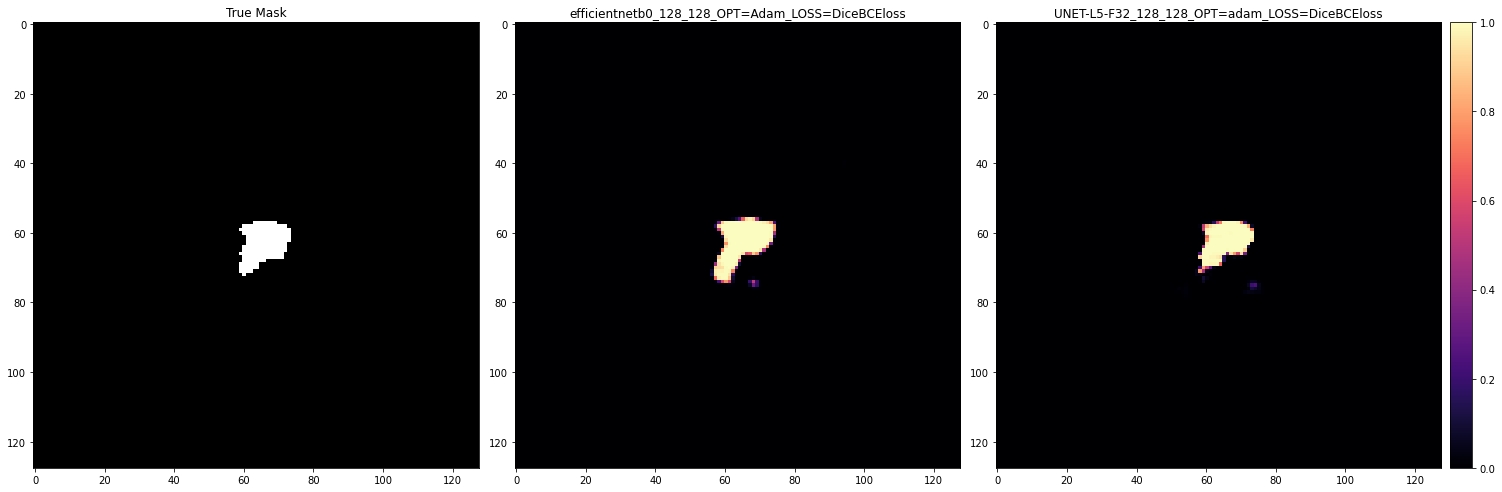

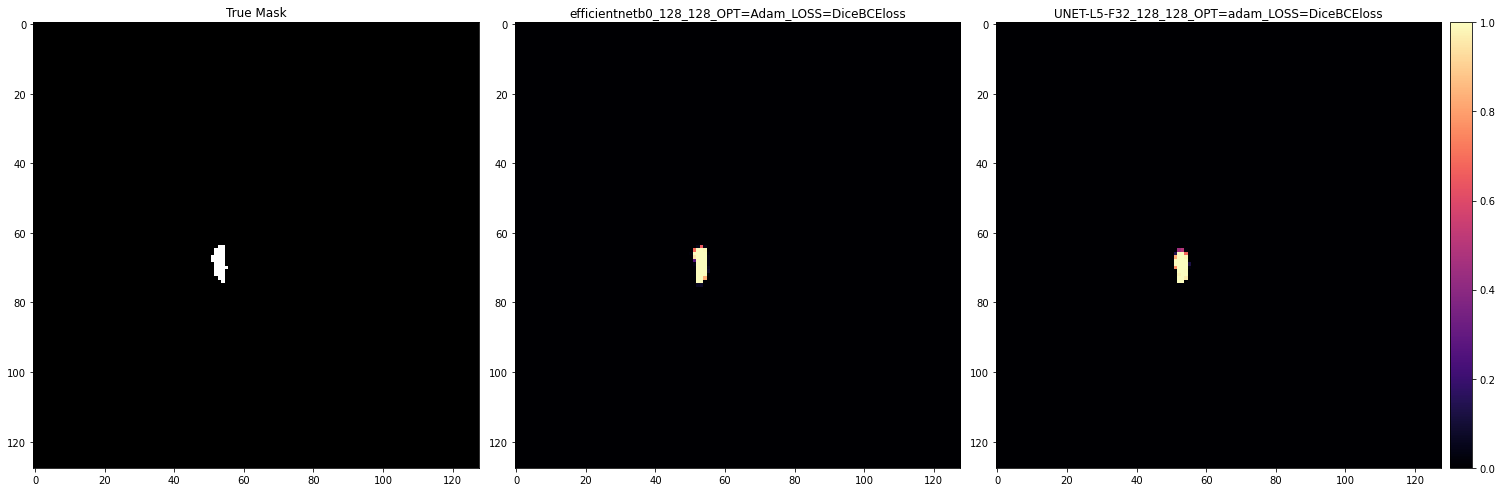

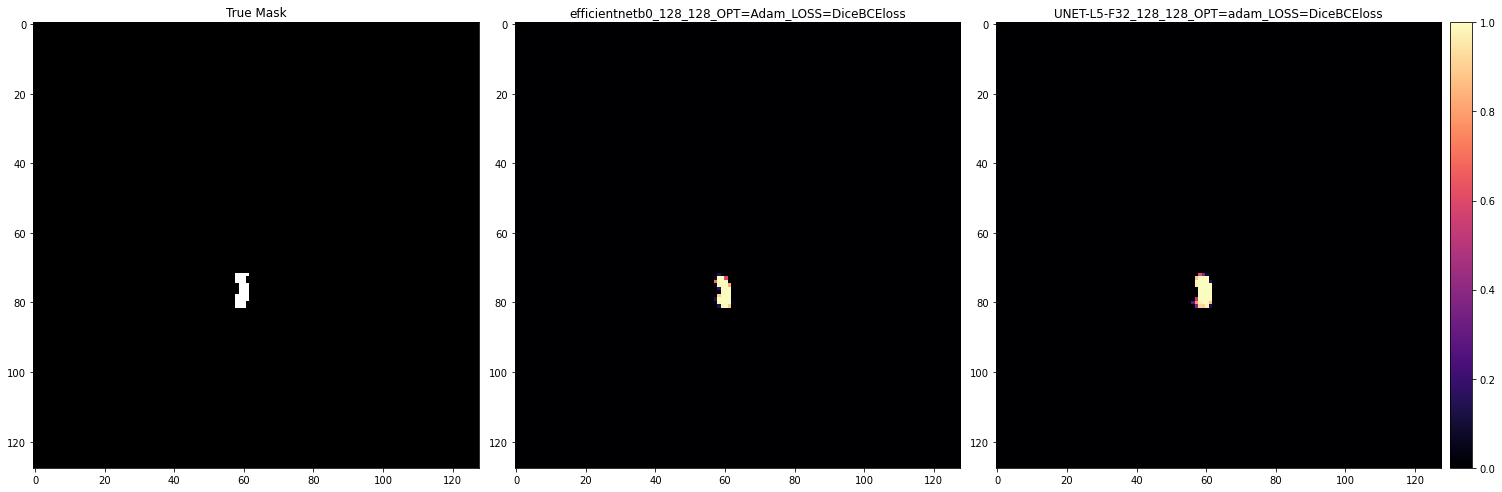

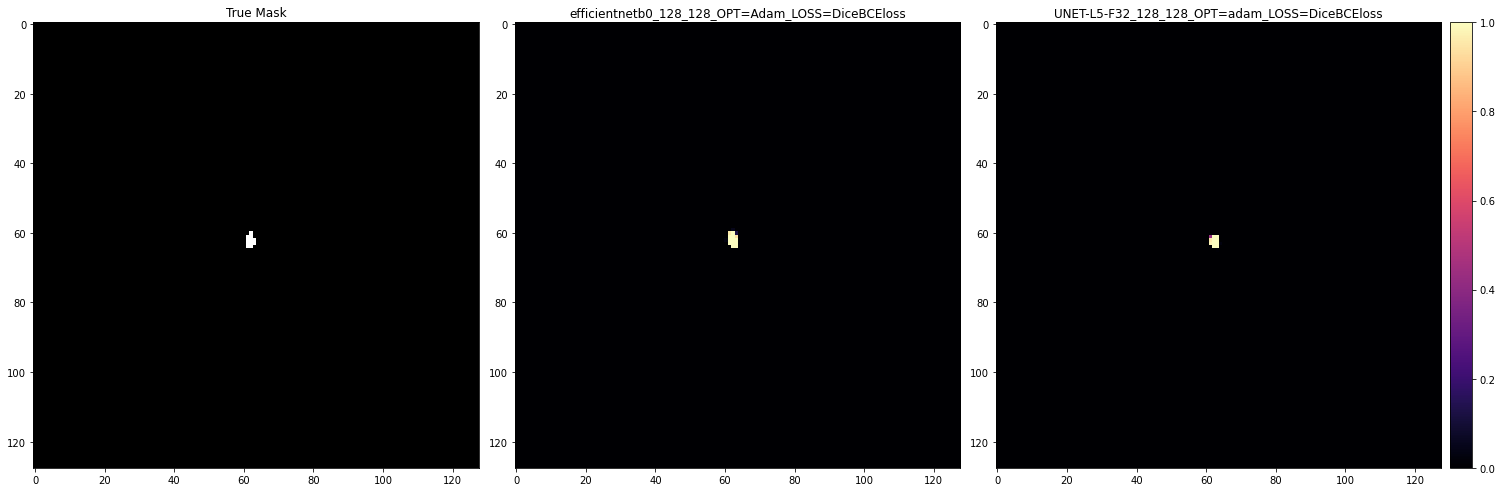

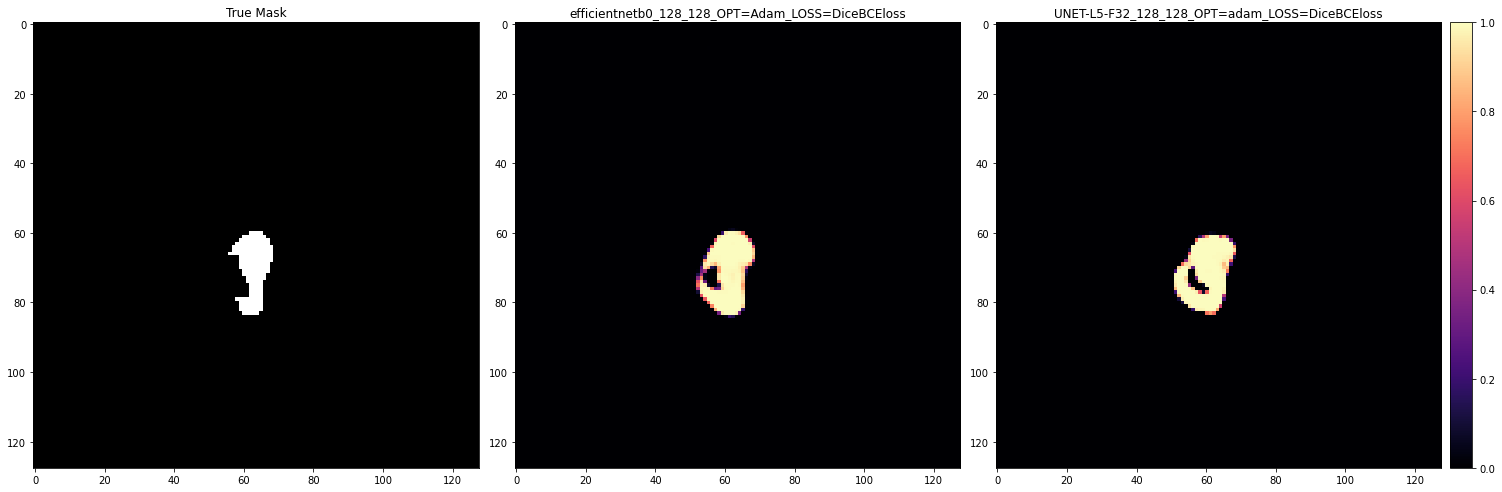

In [12]:
show_multiple_predictions(training_generator, keys, values, 5, cmap='magma', figsize=(20,16))

## VALIDATION

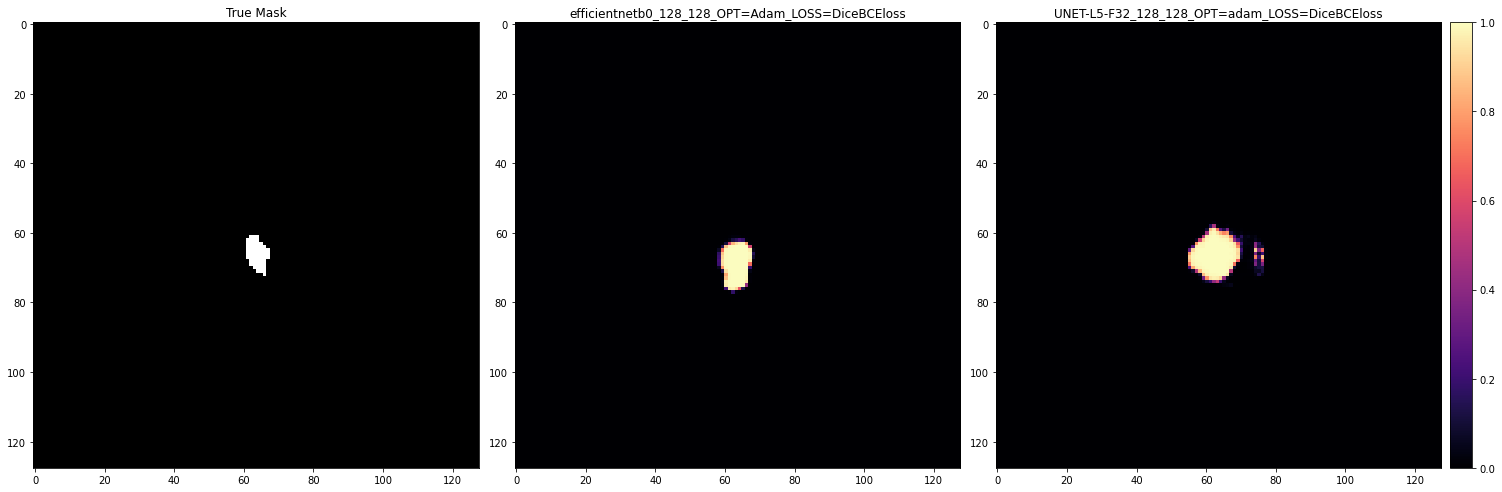

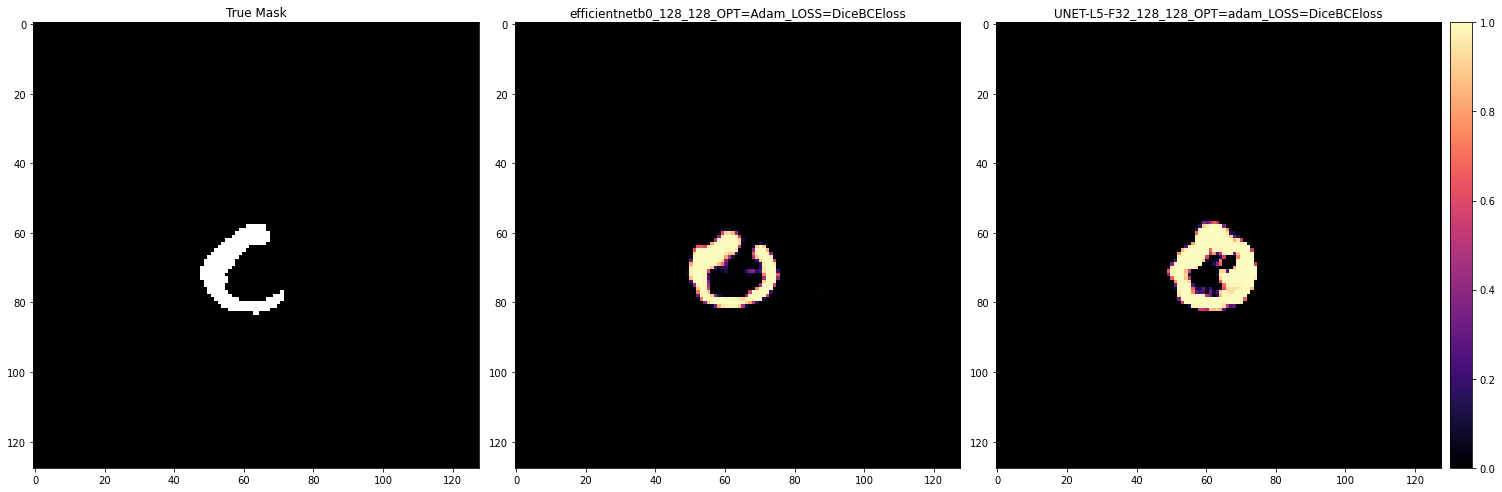

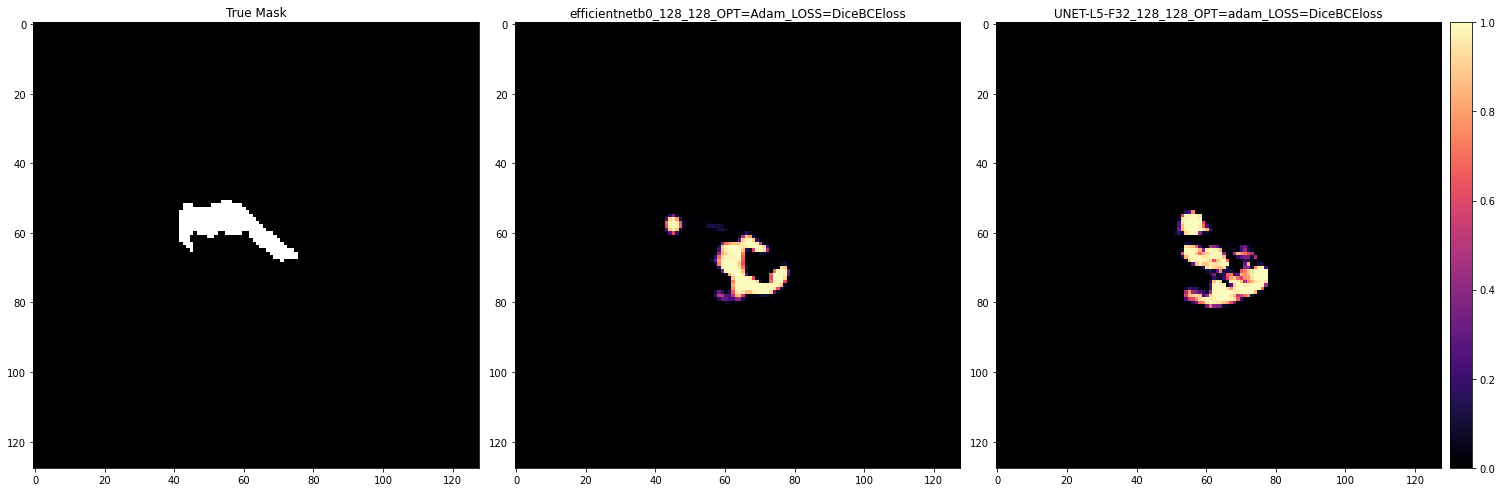

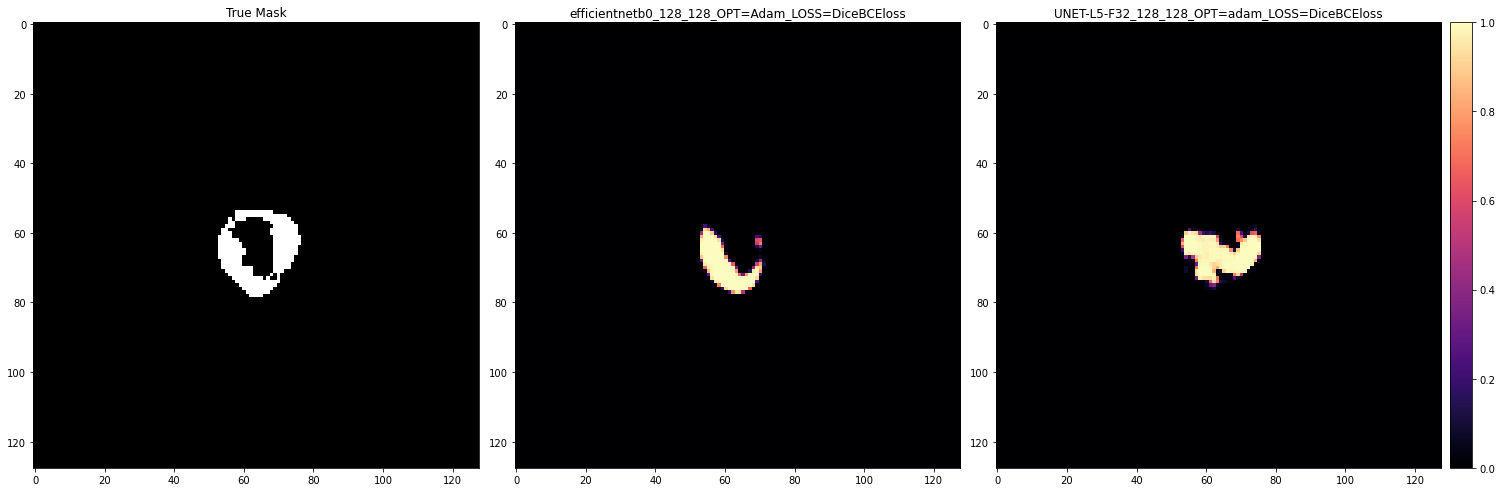

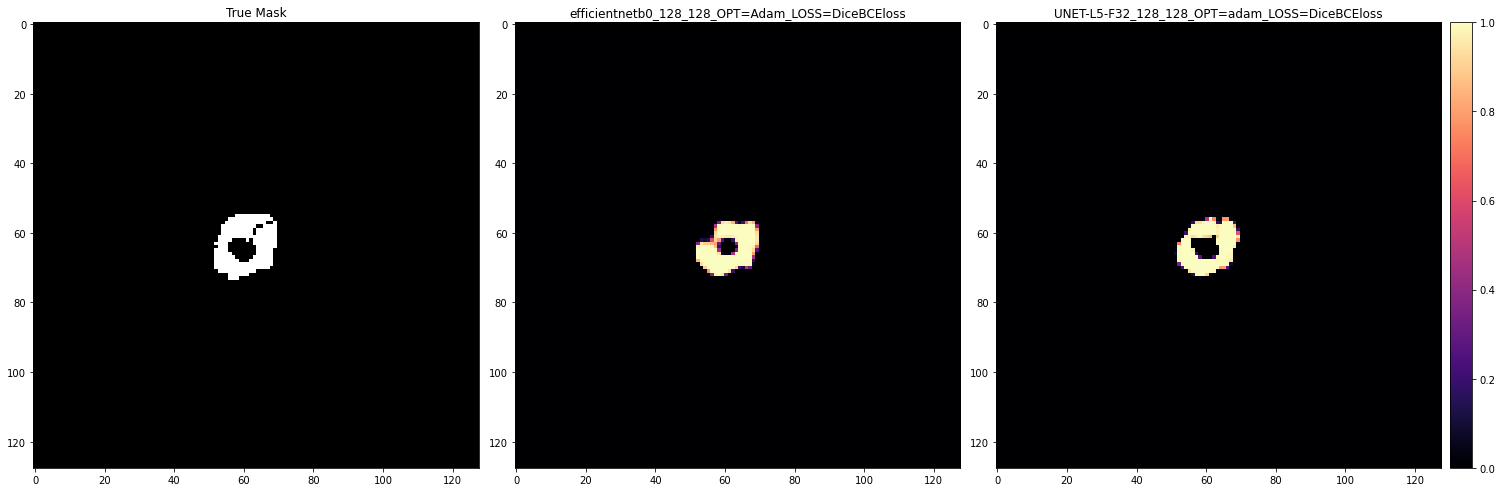

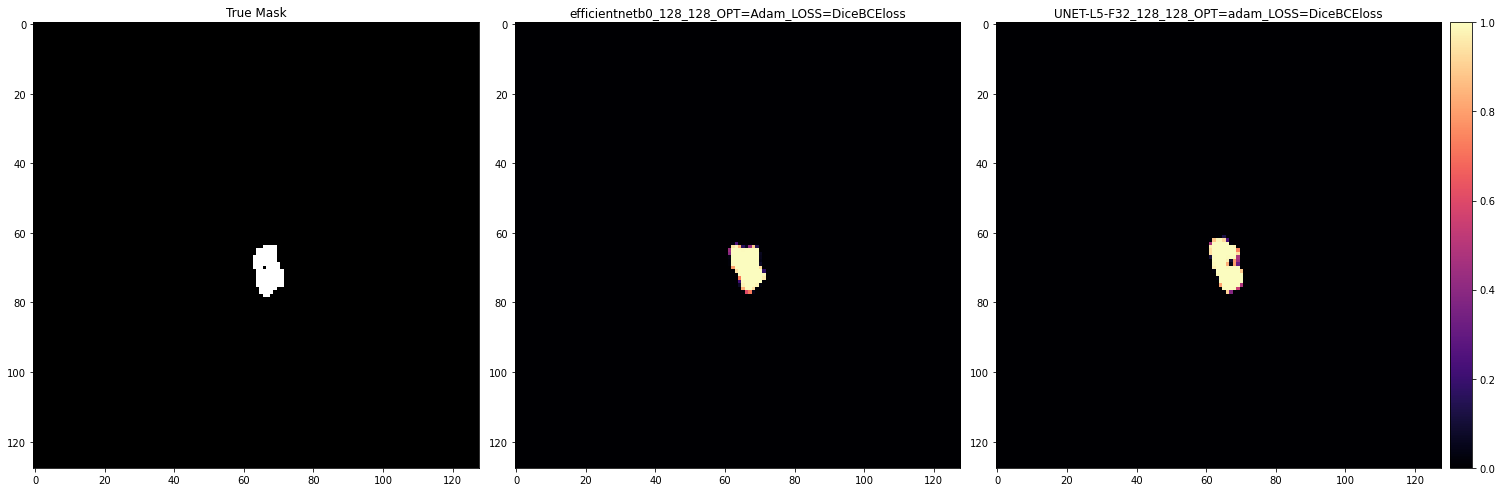

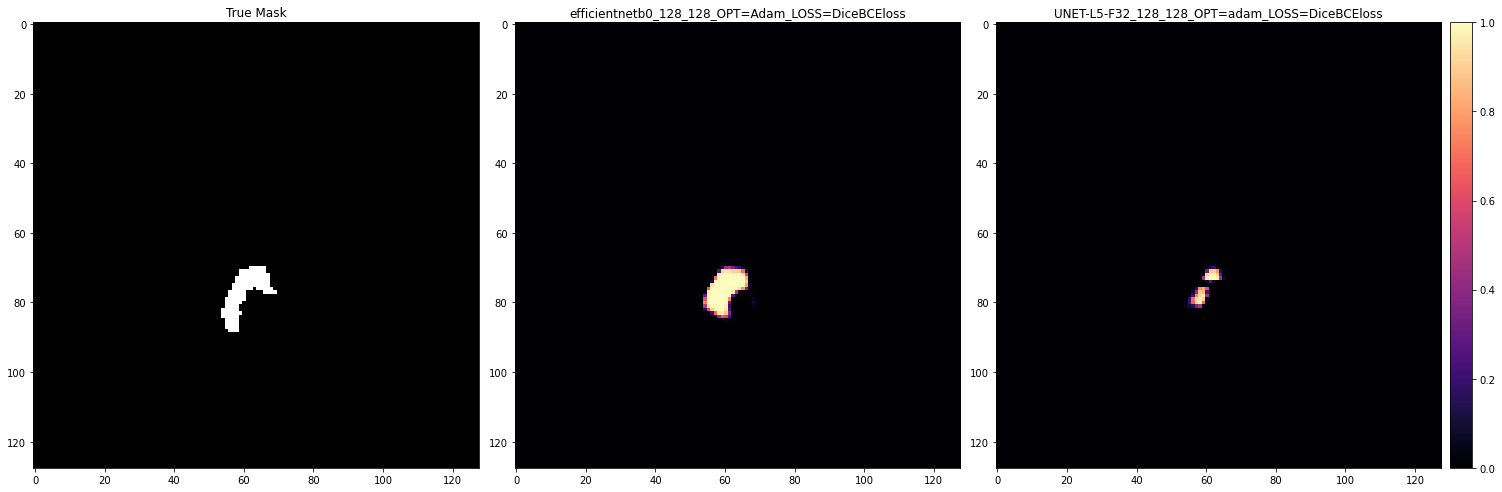

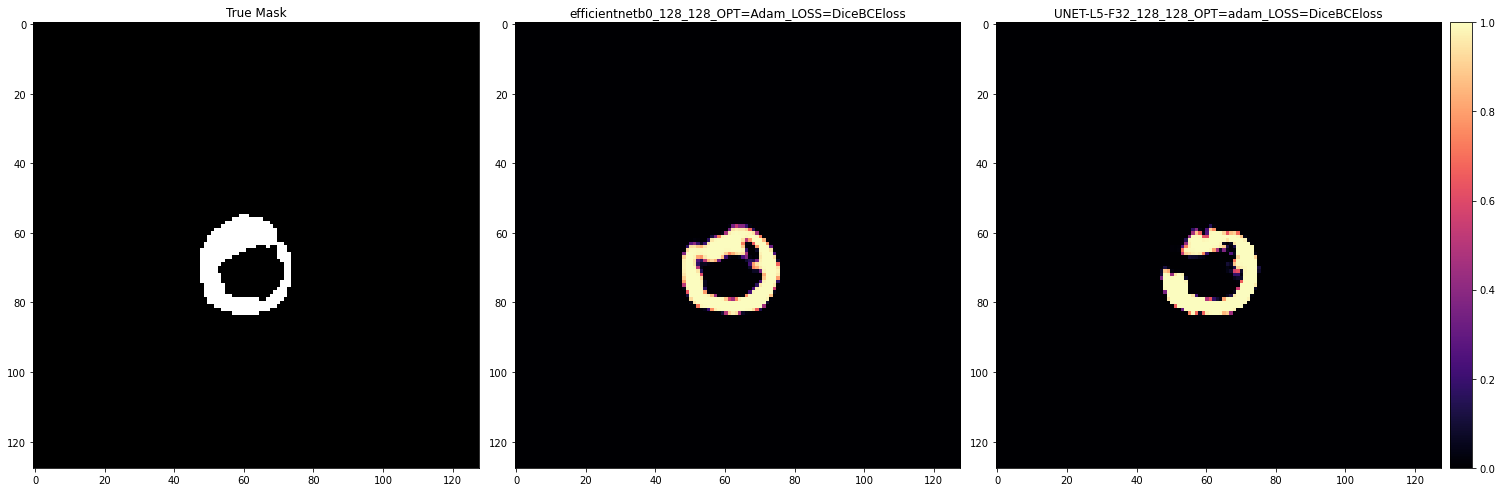

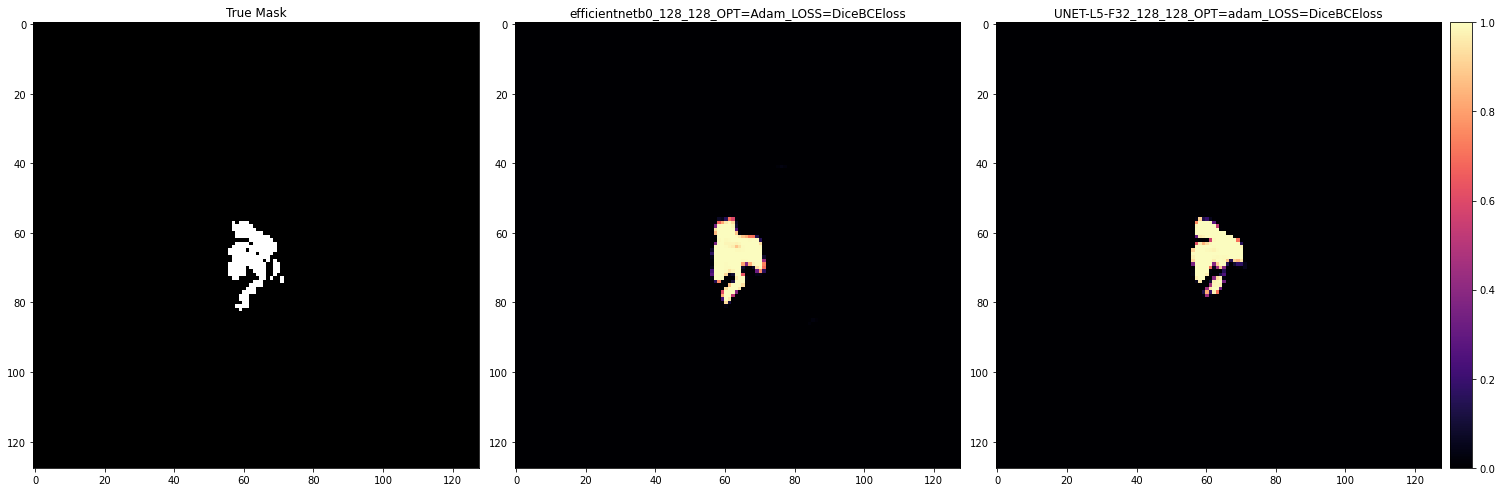

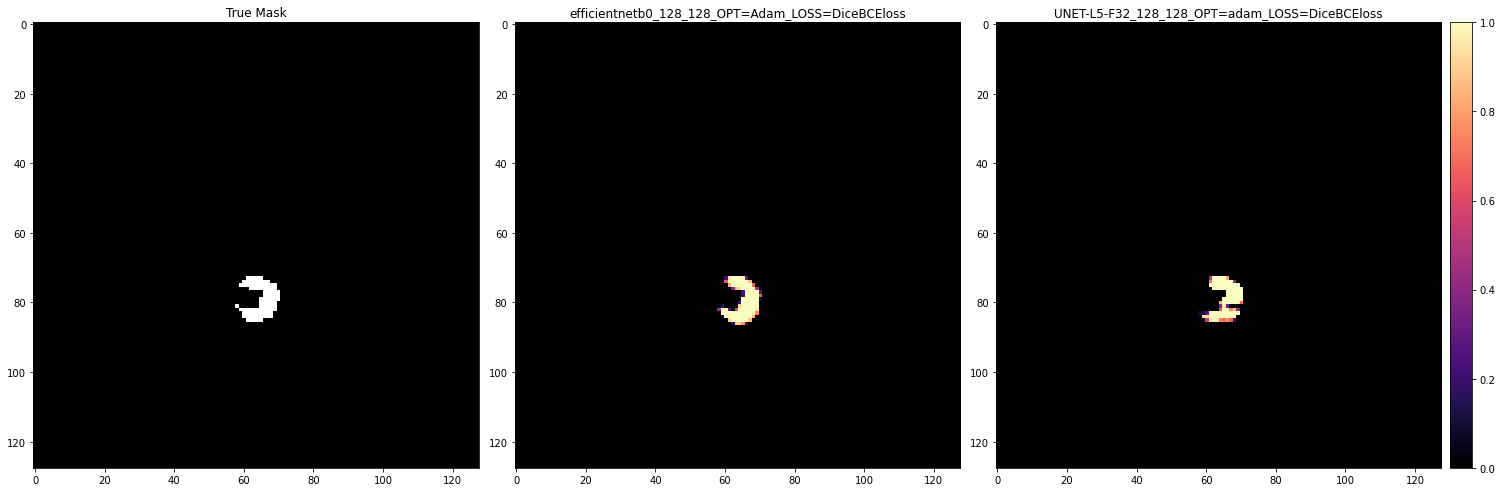

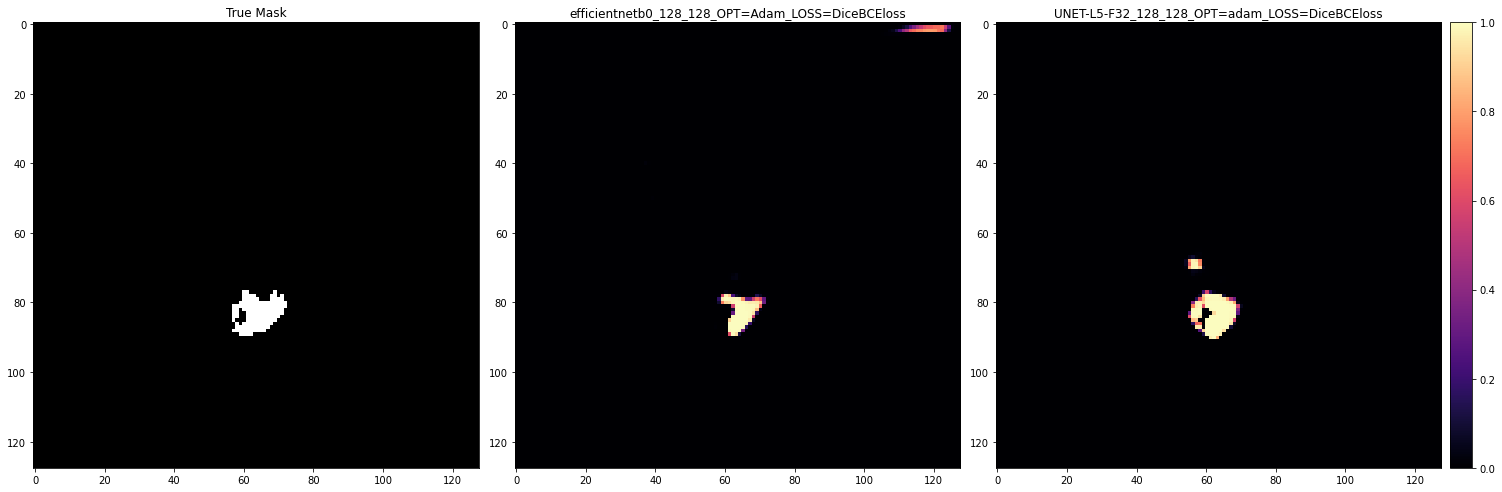

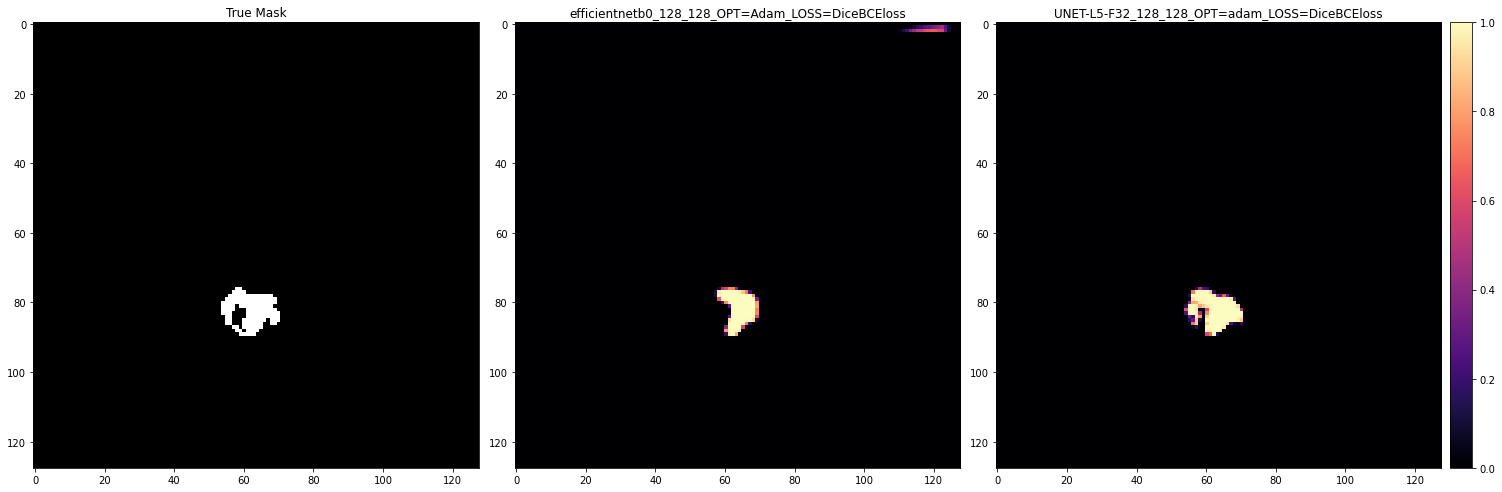

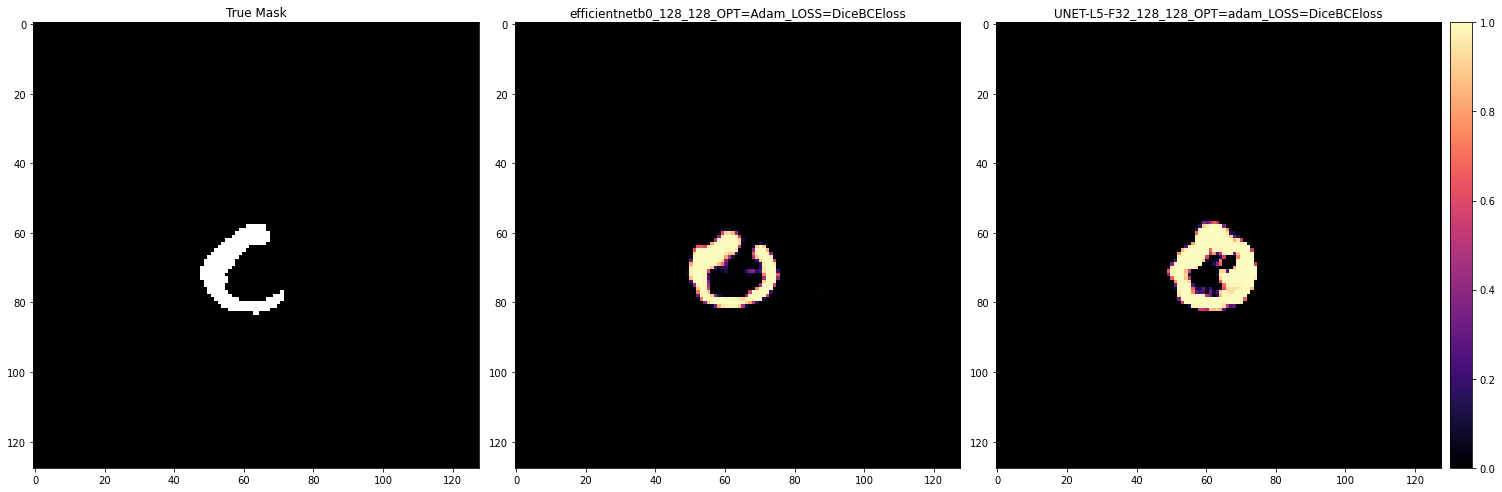

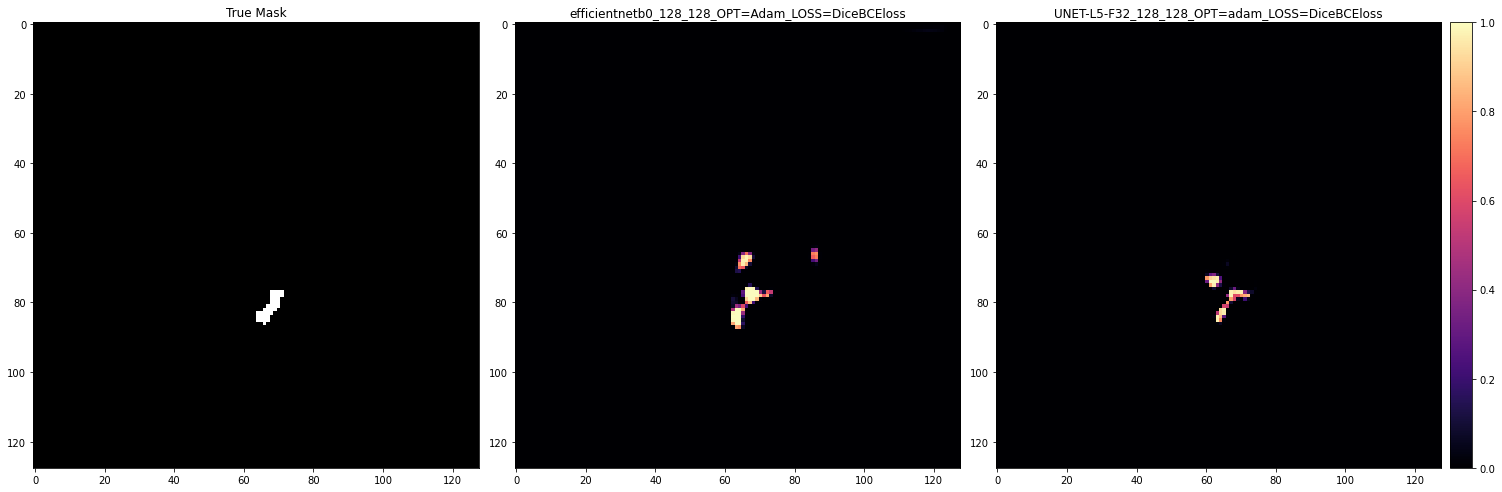

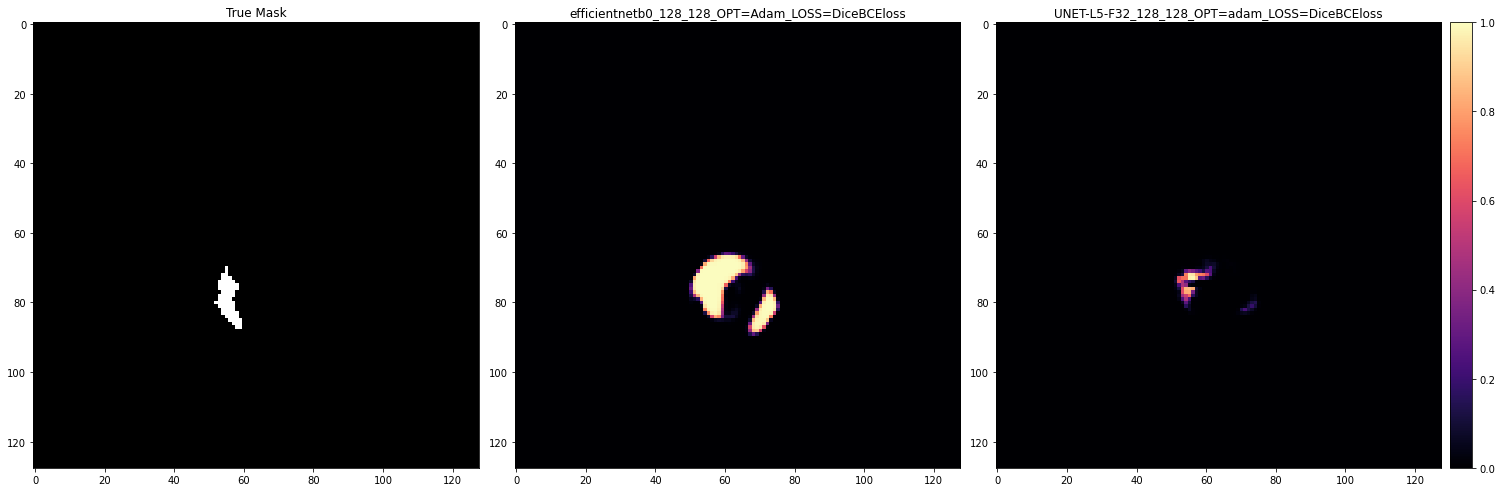

In [11]:
show_multiple_predictions(validation_generator, keys, values, 15, cmap='magma', figsize=(20,16))

## TRAINING

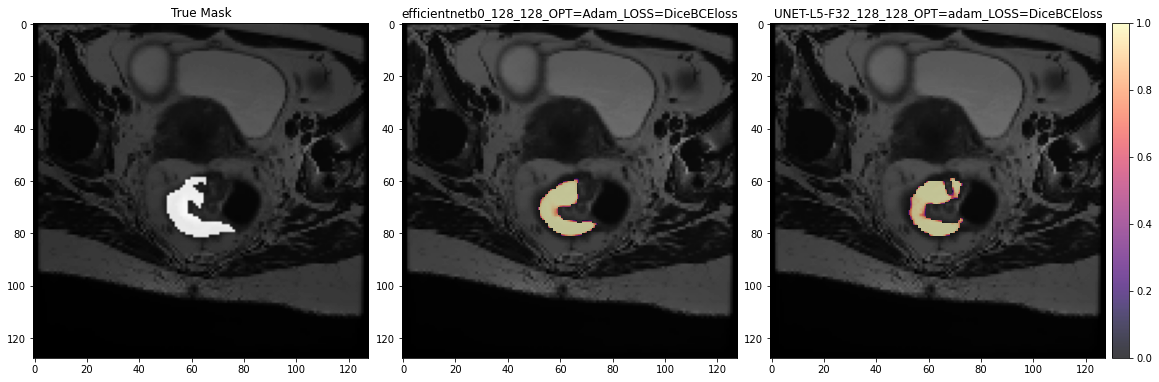

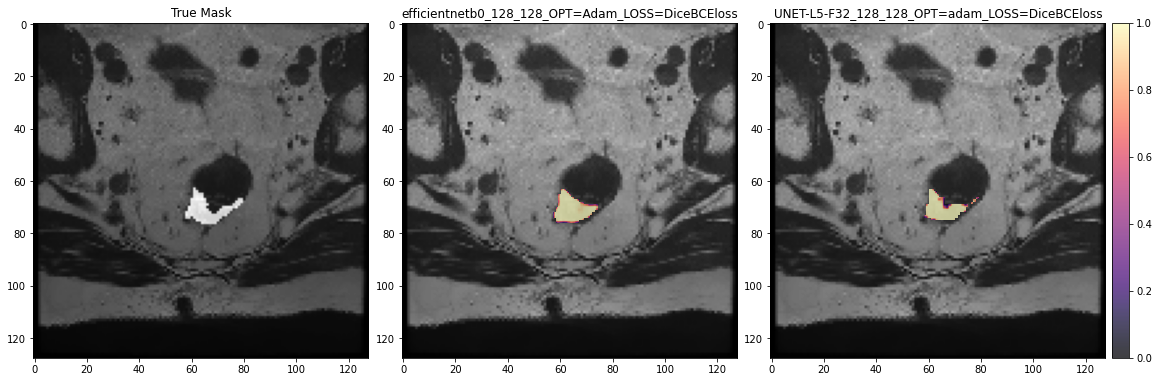

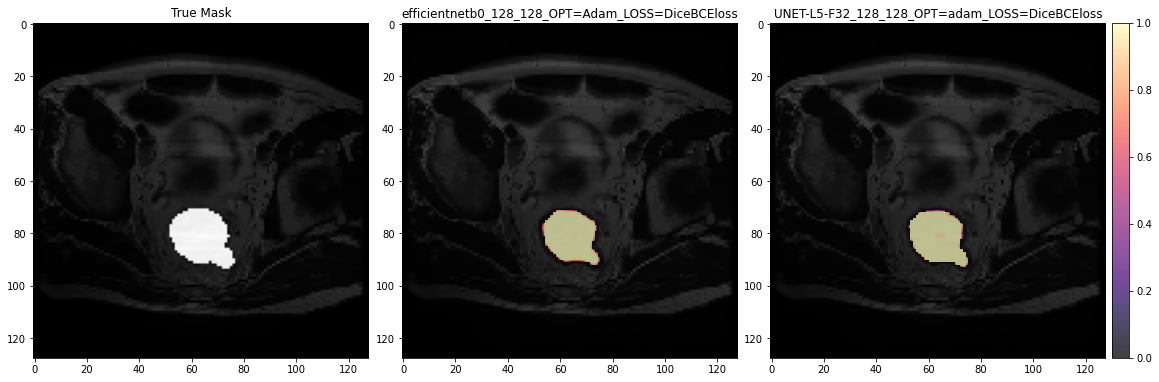

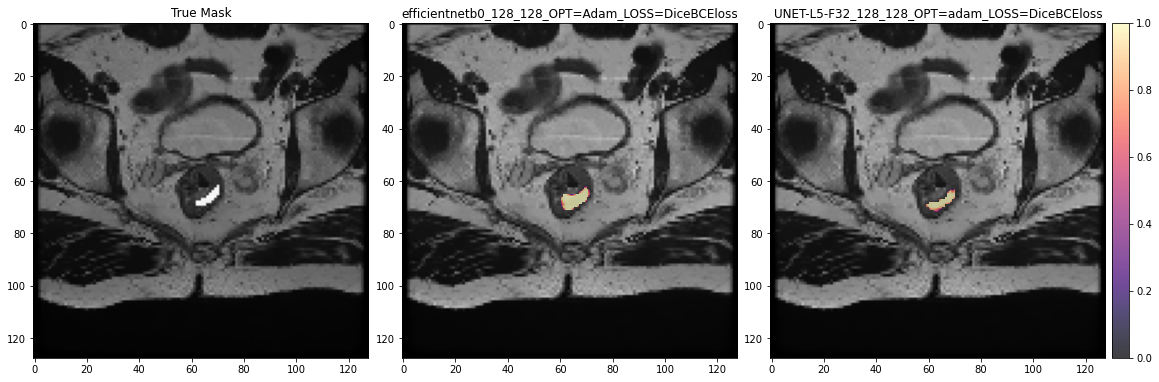

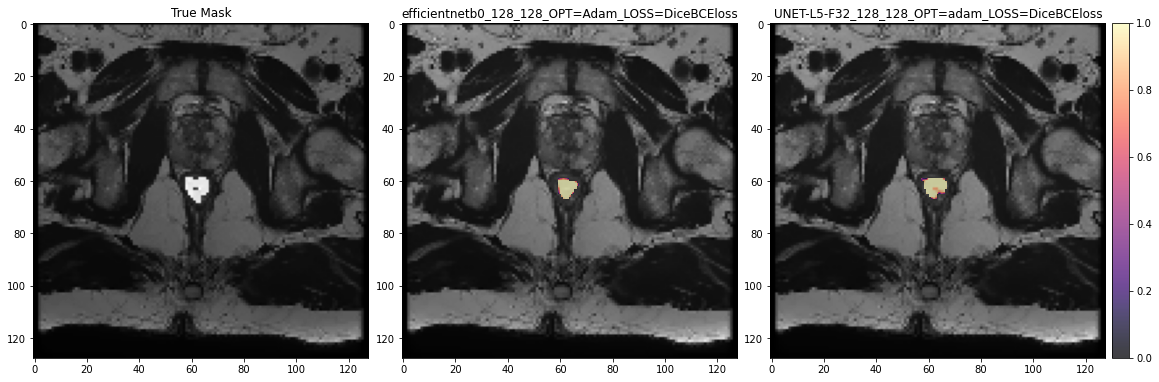

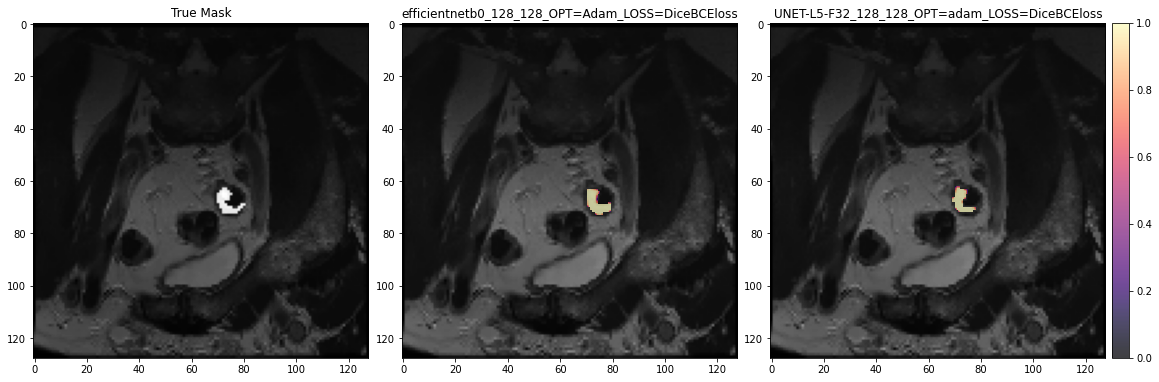

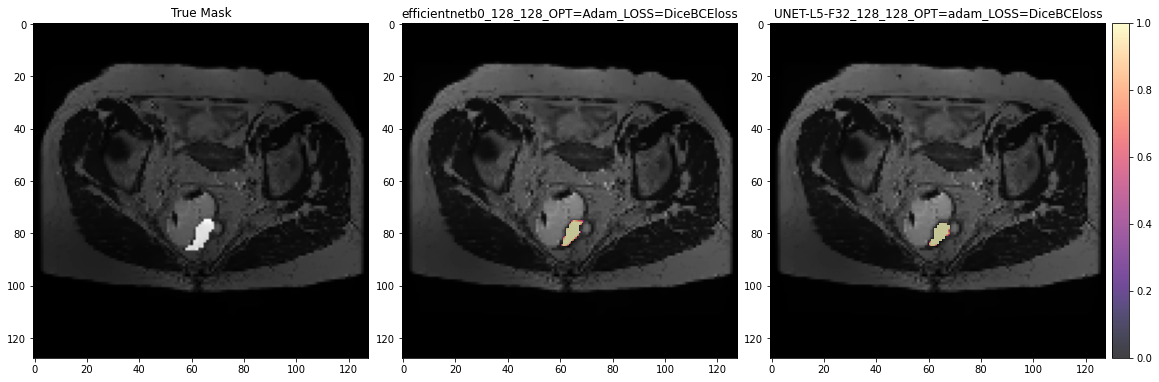

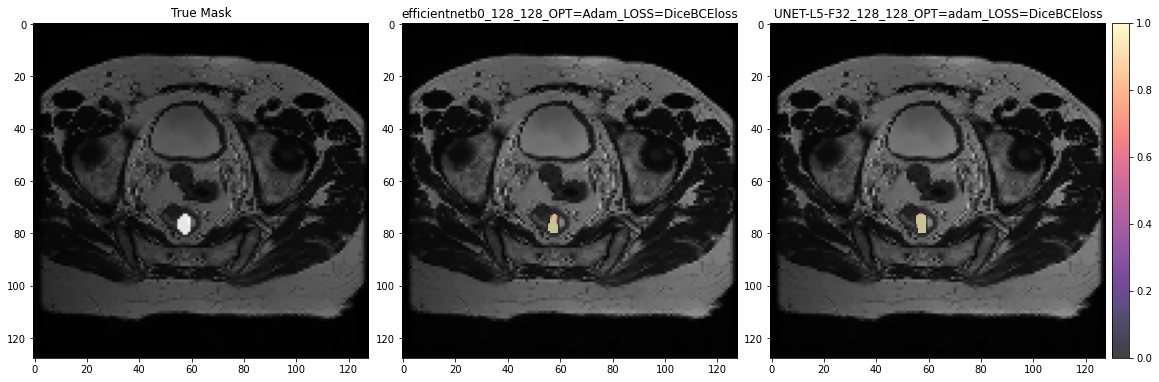

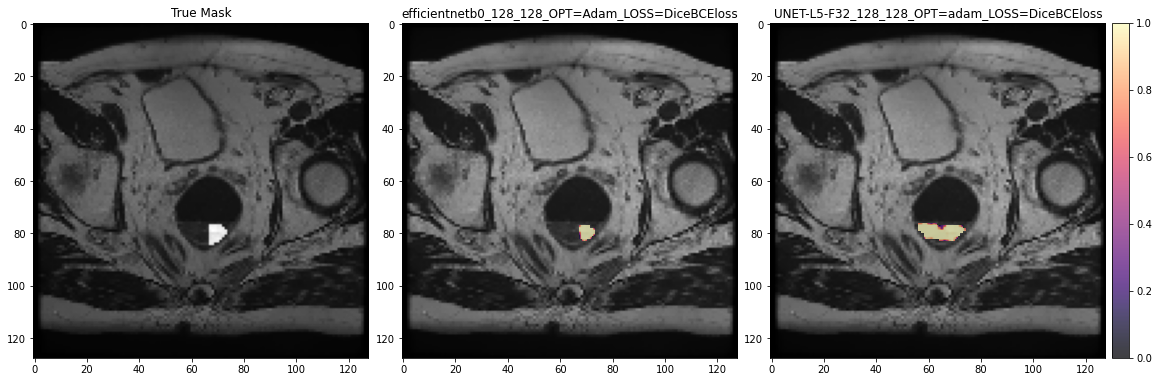

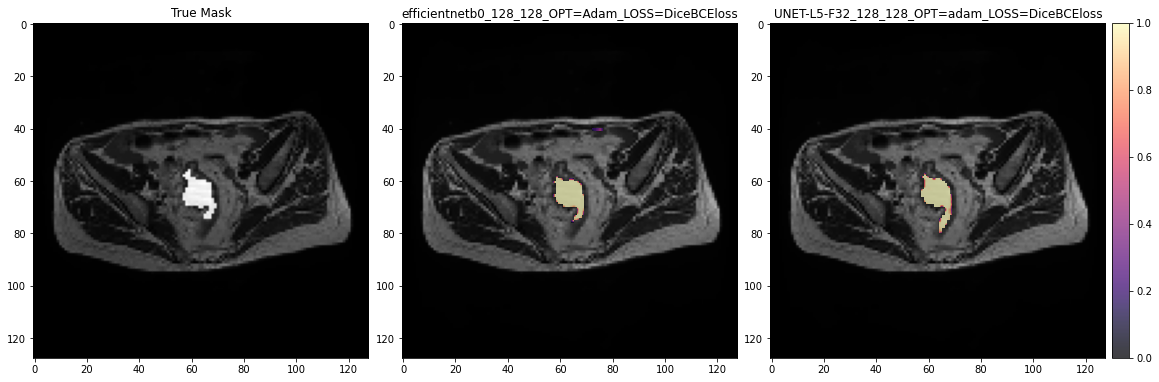

In [10]:
show_multiple_overlap(training_generator, keys, values, 10, cmap='magma', figsize=(20,16))

## VALIDATION

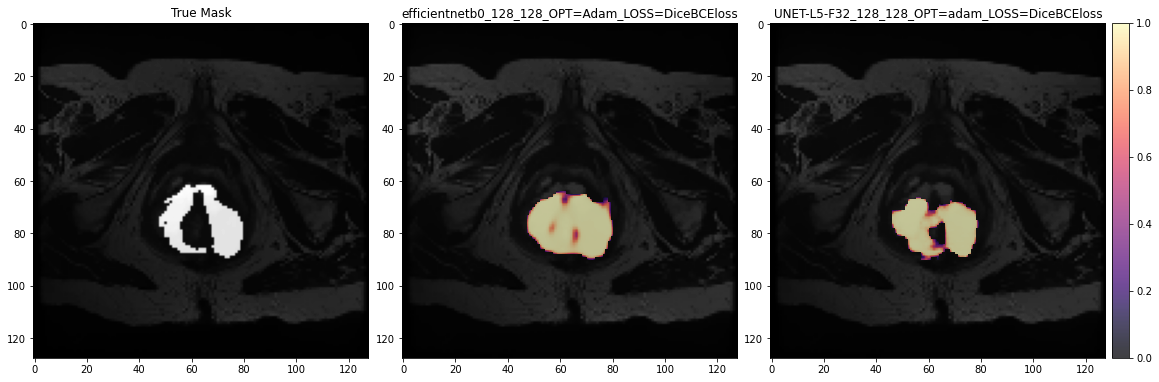

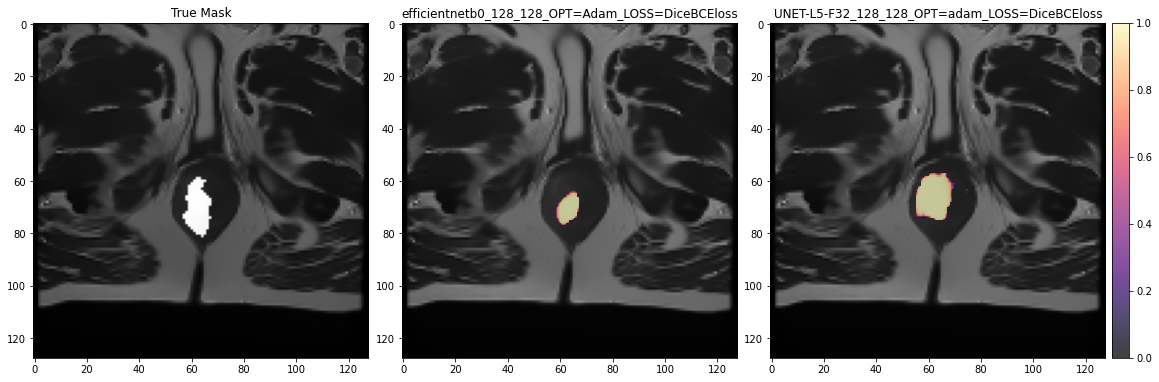

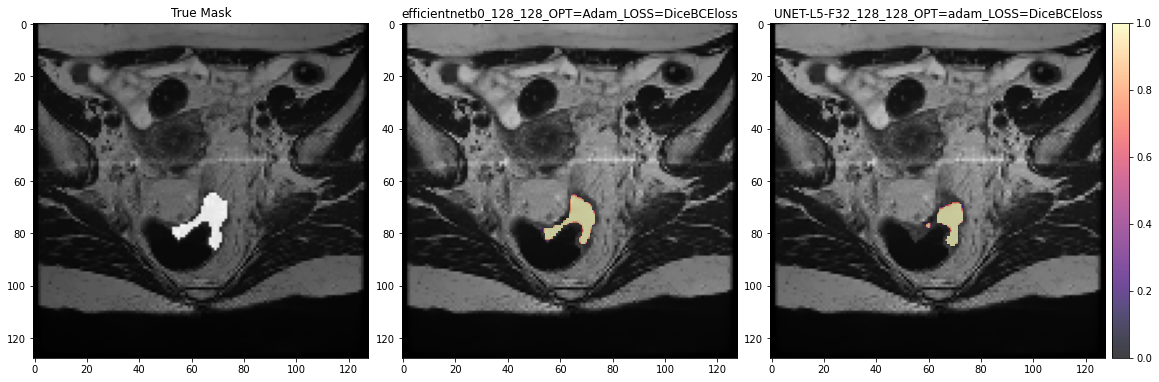

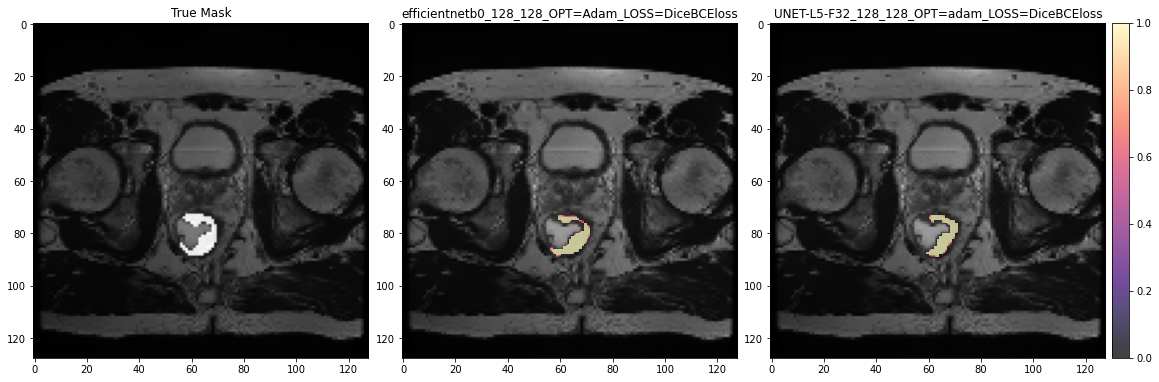

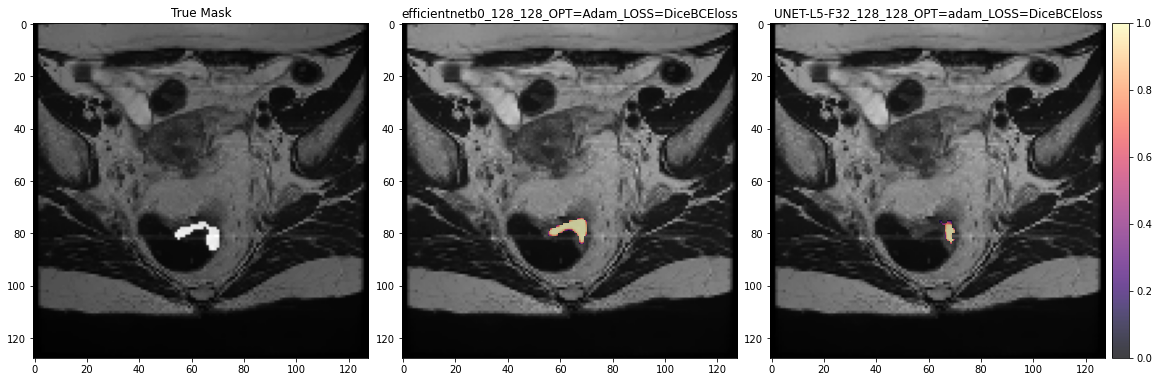

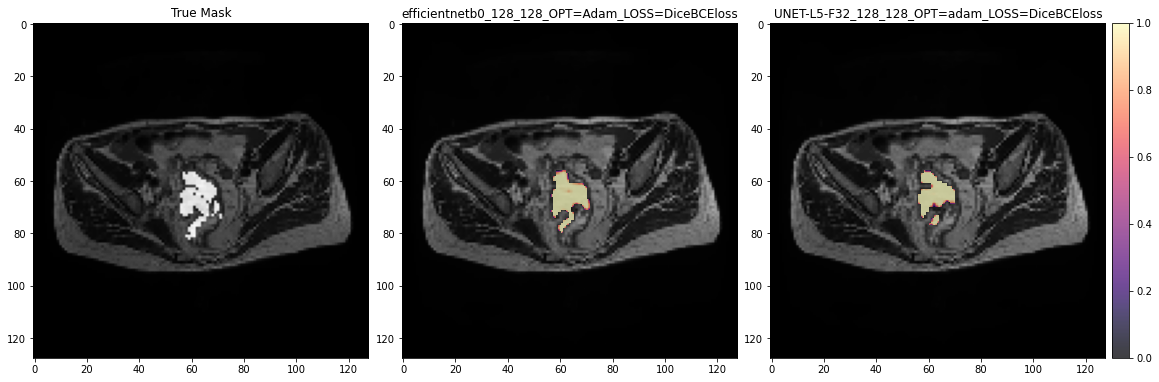

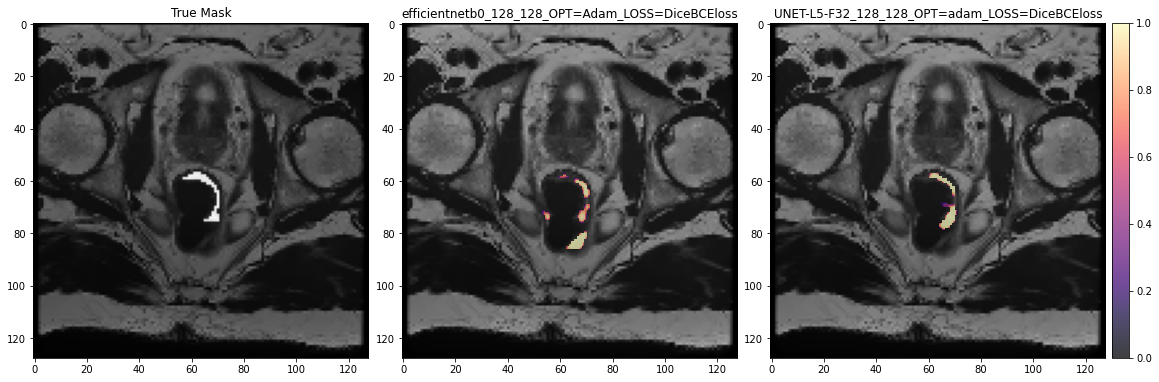

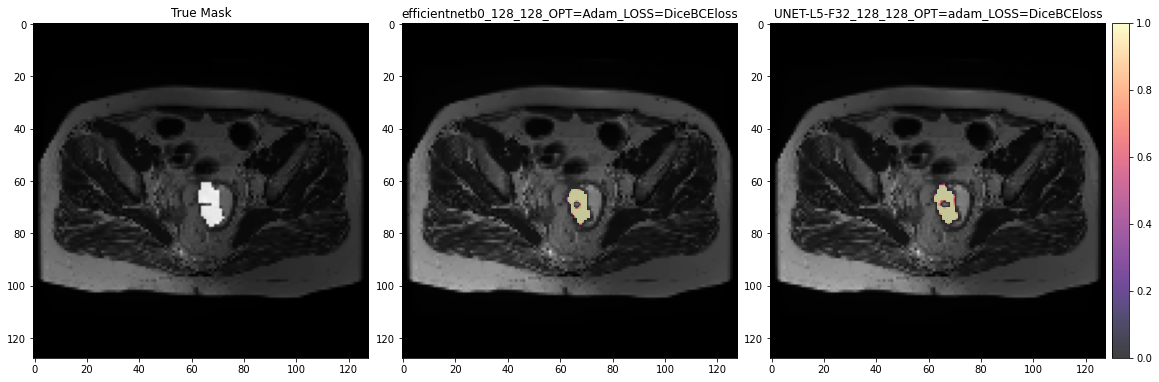

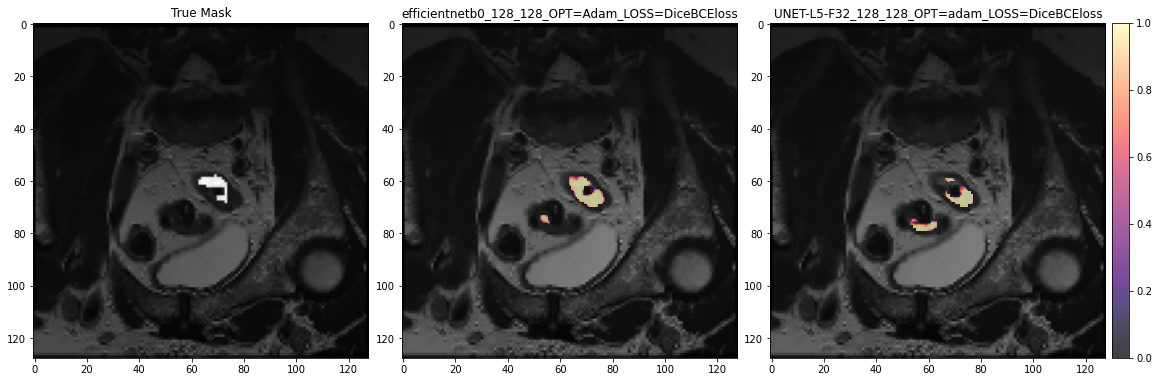

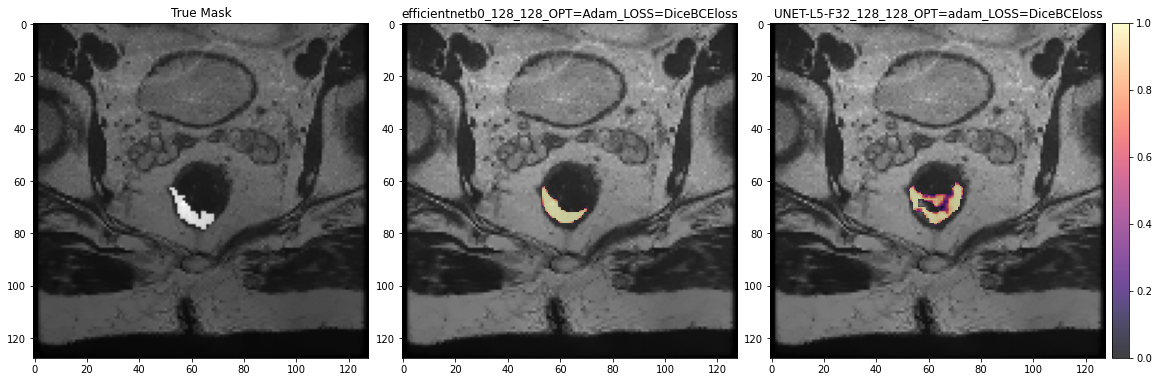

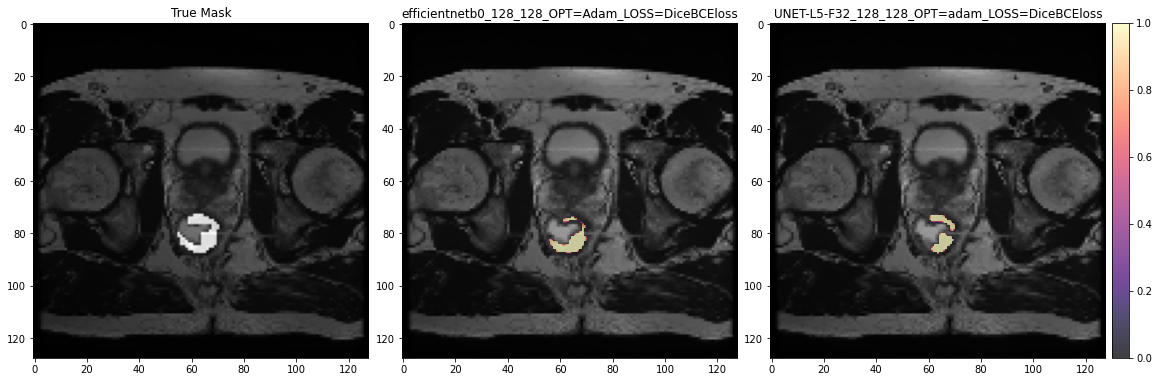

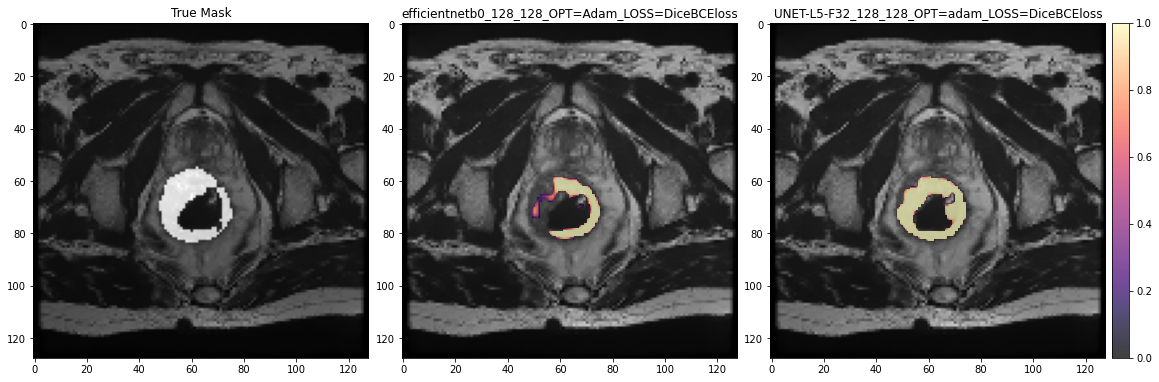

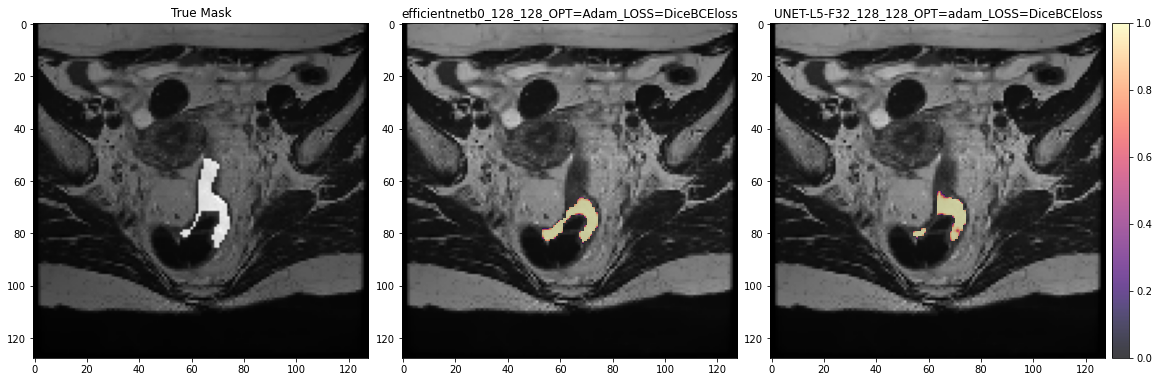

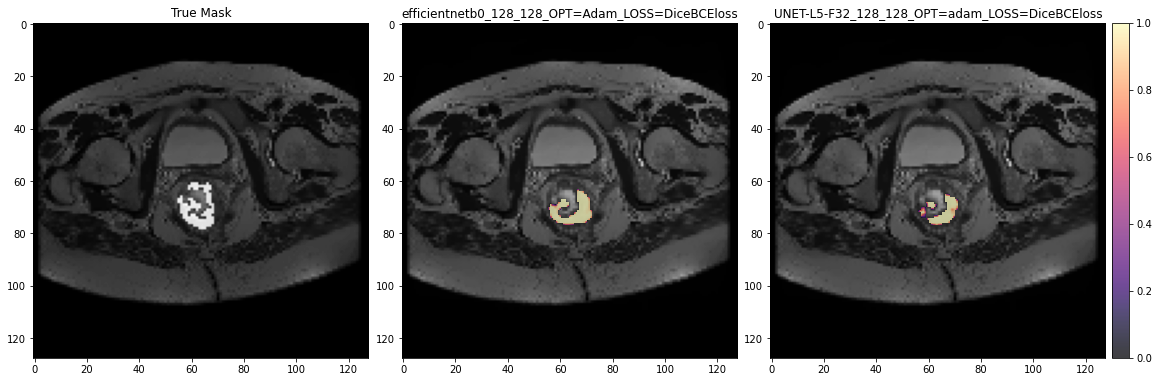

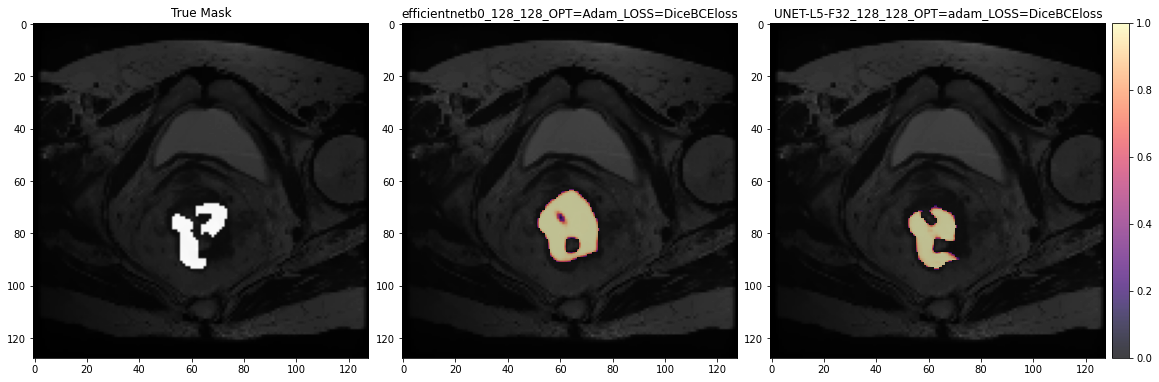

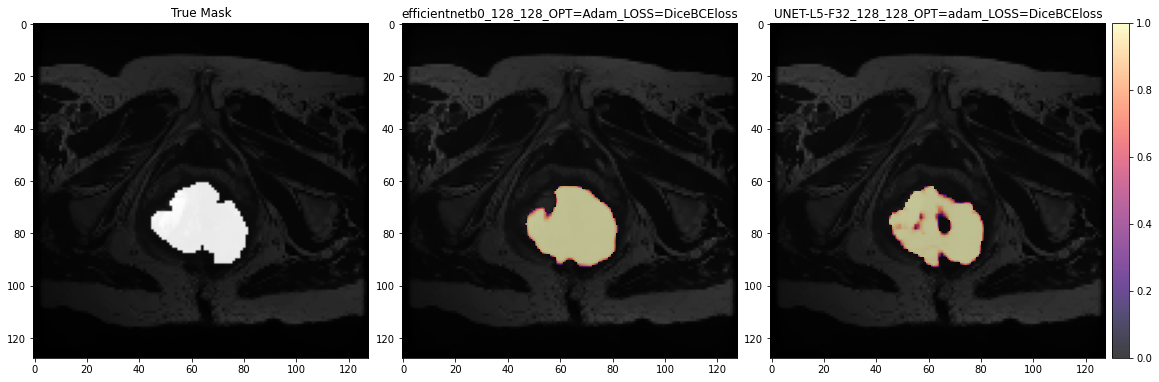

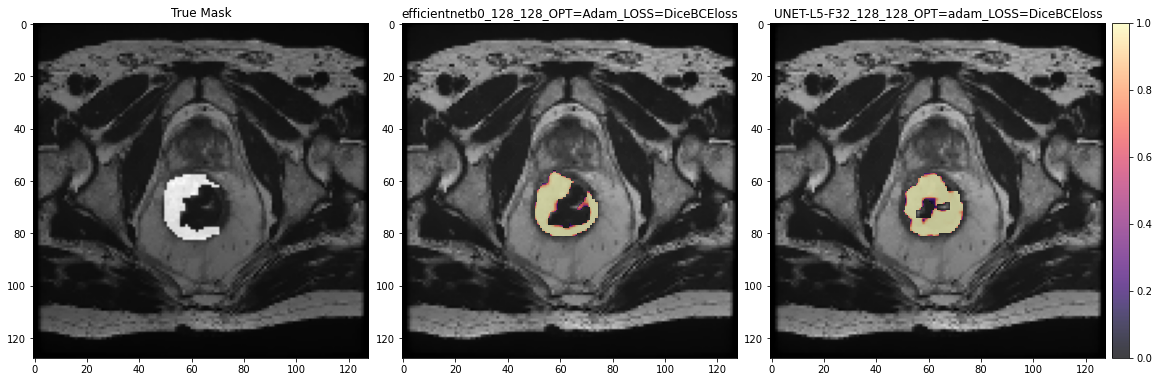

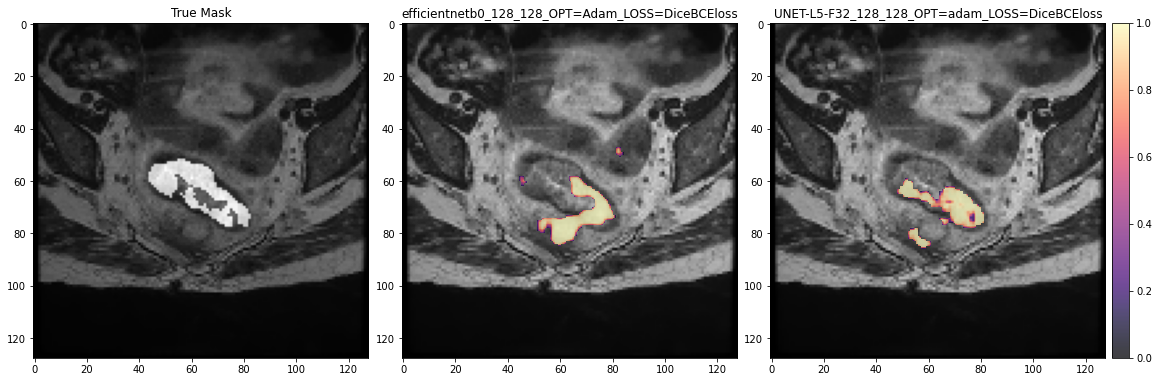

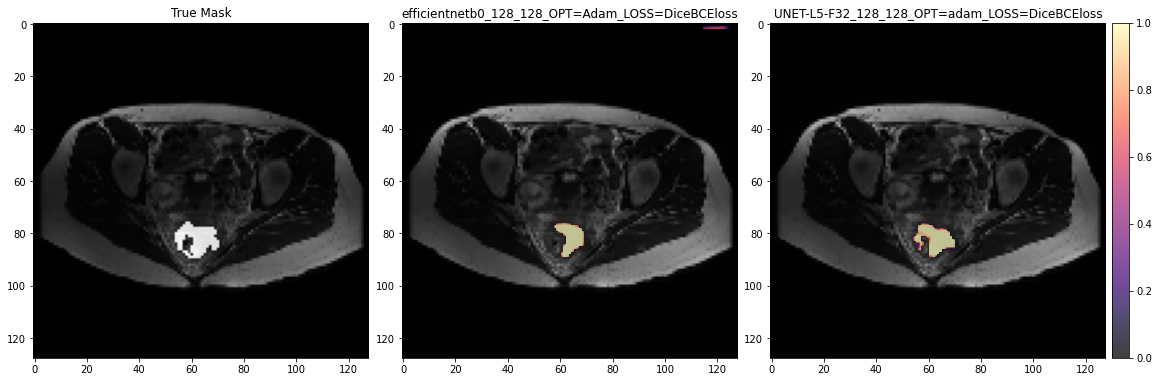

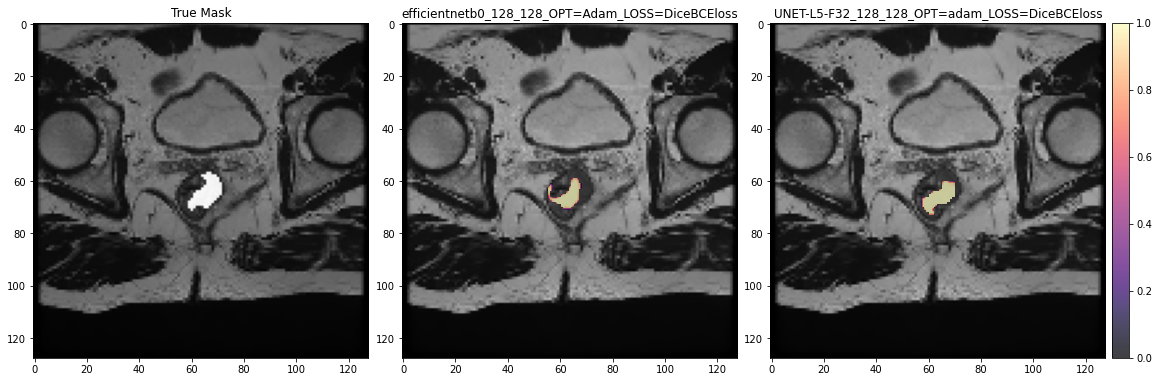

In [9]:
show_multiple_overlap(validation_generator, keys, values, 20, cmap='magma', figsize=(20,16))